# HM1: Logistic Regression.

### Name: Joshua Cubero


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also, you should plot their objective values versus epochs and compare their training and testing accuracy. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [1]:
# Load Packages
import numpy as np
import random as rnd
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 1.2 Examine and clean data

In [3]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.
df = df.replace({'M': 1,'B': -1})
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
#Use of iloc and slicing leaves out ID column.
X = np.array([df.iloc[:,2:32]]).reshape(569,30)
y = np.array(df['diagnosis']).reshape(569,1)
d = X.shape[1]

## 1.3. Partition to training and testing sets

In [5]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machine learning.
split = int(0.8*len(X))
x_train, x_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## 1.4. Feature scaling

Use the standardization to transform both training and test features

In [6]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).reshape(1, d)
sig = numpy.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
[-0.15421396  0.36734644 -0.15216679 -0.13011779 -0.03764451 -0.06095979
 -0.15968807 -0.18264447 -0.20577445  0.11252658 -0.11462619  0.14746728
 -0.09472252 -0.06878809  0.08026941 -0.09071034 -0.08845148 -0.1073992
 -0.22935047 -0.02350692 -0.18689467  0.21990882 -0.1751222  -0.16131338
 -0.03903494 -0.1155415  -0.14820649 -0.19491169 -0.31065331 -0.01879552]
test std = 
[1.02409598 1.20104314 1.02823038 1.05254889 1.12623735 0.8975497
 0.92492381 0.93975209 0.84870282 1.0407246  1.11662724 1.16849856
 1.10827607 1.35656254 1.01798397 0.78409753 0.6656818  0.94213695
 0.67826598 0.75174437 0.98497496 1.06139417 1.00696616 1.02714708
 0.95963507 0.82460324 0.90787878 0.89791033 0.72641788 0.89866581]


In [7]:
print(x_train.shape)
print(x_test.shape)

(455, 30)
(114, 30)


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistic regression and when $\lambda > 0$, it essentially becomes a regularized logistic regression.

In [8]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
    wTx = np.dot(x,w)
    z = np.multiply(y,wTx)
    exp_z = 1 + np.exp(-z)
    l_z = np.log(exp_z)
    l2_reg = l_z + ((lam/2) * np.sum(w*w))
    obj = np.mean(l2_reg)
    return obj

# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [9]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w,x,y,lam):
    n,d = x.shape
    yx = np.multiply(y,x)
    wTx = np.dot(x,w)
    z = np.multiply(y,wTx)
    denominator = 1 + np.exp(z)
    quotient = (-yx)/denominator     
    g = np.mean(quotient,axis=0).reshape(d,1) + (lam*w) 
    return g

In [10]:
# Gradient descent for solving logistic regression
# You will need to do iterative processes (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w = None, max_epoch=100):
    if w == None:
        w = np.zeros((x.shape[1],1))
    obj_vals = np.zeros(max_epoch)
    
    for i in range(max_epoch):
        obj = objective(w,x,y,lam)
        obj_vals[i] = obj
        gd = gradient(w,x,y,lam)
        w -= learning_rate * gd
    return w, obj_vals

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [11]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
wbgd, obj_1 = gradient_descent(x_train,y_train,0,0.1)

In [12]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
l2_wbgd, obj_2 = gradient_descent(x_train,y_train,0.1,0.1)

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [13]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    #Stochastic Objective
    d = xi.shape[0]
    xTw = np.dot(xi.reshape(1,30),w)    
    z = yi * xTw
    log_z = np.log(1 + np.exp(-z))    
    obj = log_z + (lam/2) * np.sum(w * w)
    
    #Stochastic Gradient
    yi_xi = np.multiply(yi,xi).reshape(1,30)
    cost = -yi_xi.T / (1 + np.exp(z))
    gdt = cost + (lam * w)
    return obj,gdt

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [14]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w = None, max_epoch=100):
    n,d = x.shape
    sgd_obj_vals = np.zeros(max_epoch)
    
    if w is None:
        w = np.zeros((d,1))
        
    for i in range(max_epoch):
        rand_i = np.random.permutation(n)
        random_x = x[rand_i, :]
        random_y = y[rand_i, :]
        sgd_obj_val = 0
        
        for j in range(n):
            xi = random_x[j, :].reshape(1,30)
            yi = float(random_y[j, :])            
            obj, gdt = stochastic_objective_gradient(w, xi, yi, lam = 0)
            sgd_obj_val += obj
            w -= learning_rate * gdt
        learning_rate *= .9
        sgd_obj_val /= n
        sgd_obj_vals[i] = sgd_obj_val
    return w, sgd_obj_vals

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [15]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
wsgd, obj3 = sgd(x_train,y_train,lam=0,learning_rate=0.1)

In [16]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
l2_wsgd, obj4 = sgd(x_train,y_train,lam=0.1,learning_rate=0.1)

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [17]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam = 0):
    n,d = xi.shape
    #
    wTx = np.dot(xi,w)
    z = np.multiply(yi,wTx)
    exp_z = 1 + np.exp(-z)
    l_z = np.log(exp_z)
    l2_reg = l_z + ((lam/2) * np.sum(w*w))
    obj = np.mean(l2_reg)
    
    yx = np.multiply(yi,xi)
    wTx = np.dot(xi,w)
    z = np.multiply(yi,wTx)
    denominator = 1 + np.exp(z)
    quotient = (-yx)/denominator     
    g = np.mean(quotient,axis=0).reshape(d,1) + (lam*w) 
    return obj, g

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [18]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)


def mbgd(x, y, b, lam = 0, learning_rate = 1.0, w = None, max_epoch=100):
    n,d = x.shape
    mbgd_obj_vals = np.zeros(max_epoch)
    iters = n//b
    if w is None:
        w = np.zeros((d,1))
    
    for i in range(max_epoch):
        #Creates uniform sampled indicies.
        rand_i = np.random.permutation(n)
        random_x = x[rand_i, :]
        random_y = y[rand_i, :]        
        #indices = np.random.choice(n, b,replace = False)            
        sgd_obj_val = 0
        for j in range(iters):
            #Calculates gradient and objective values
            indices = np.random.choice(n, b,replace = False) 
            xi = random_x[indices,:]
            yi = random_y[indices]
            obj,gdt = mb_objective_gradient(w, xi, yi,lam)            
            sgd_obj_val += obj             
            w -= learning_rate * gdt
        learning_rate *= .9
        sgd_obj_val /= b
        mbgd_obj_vals[i] = sgd_obj_val
    return w, mbgd_obj_vals

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [19]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
wmbgd,obj5 = mbgd(x_train, y_train, b = 50, lam = 0, learning_rate = 0.5, w = None, max_epoch=100)

In [20]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
l2_wmbgd,obj6 = mbgd(x_train, y_train, b = 50, lam = .1, learning_rate = 0.5, w = None, max_epoch=100)

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

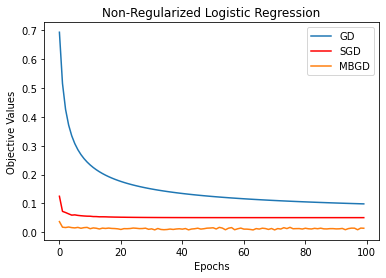

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

iters = np.arange(0,100)
plt.plot(iters,obj_1,label='GD')
plt.plot(iters,obj3,color='red',label='SGD')
plt.plot(iters,obj5,label='MBGD')
plt.xlabel('Epochs')
plt.ylabel('Objective Values')
plt.title('Non-Regularized Logistic Regression')
plt.legend()
plt.show()

The above plot depicts the results of the three non-regularized logistic regression models using BGD, SGD, and MBGD. Upon visual analysis one can see that GD requires the greatest number of epochs to find the minimum, whereas SGD and MBGD appear to find their minimums much more efficiently. However, because MBGD uses random variables each epoch, it's plot continues to display variation through all epochs. Lastly, MBGD appears to find the closest minimum to zero out of the three models.

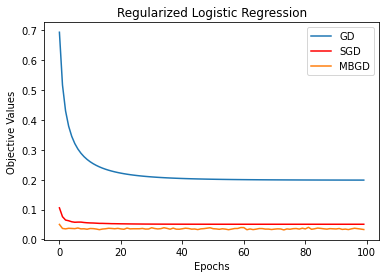

In [22]:
plt.plot(iters,obj_2,label='GD')
plt.plot(iters,obj4,color='red',label='SGD')
plt.plot(iters,obj6,label='MBGD')
plt.xlabel('Epochs')
plt.ylabel('Objective Values')
plt.title('Regularized Logistic Regression')
plt.legend()
plt.show()

The regularized logistic regression model includes the l-2 norm as a penalty to prevent overfitting. The SGD and MBGD regularized models appear to return similar results to the non-regularized logistic regression models. However, BGD appear to underperform the non-regularized models.

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [23]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    n, d = X.shape
    z = np.dot(X,w)
    f_x = np.log(1 + np.exp(-z))
    predictions = np.zeros(n)
    for i in range(n):
        if f_x[i] > 1:
            predictions[i] = -1
        elif f_x[i] <= 1:
            predictions[i] = 1
    return predictions

In [24]:
def error_rate(y_true,y_pred):
    n = y_test.shape[0]
    errors = 0
    for i in range(n):
        if y_pred[i] != y_true[i]:
            errors += 1
    rate = errors/n
    return rate

In [25]:
#Predictions for test tr
y_hat_mbgd_test = predict(wmbgd,x_test)
y_hat_sgd_test = predict(wsgd,x_test)
y_hat_wbgd_test = predict(wbgd,x_test)
y_hat_l2_bdg_test = predict(l2_wbgd,x_test)
y_hat_l2_sdg_test = predict(l2_wsgd,x_test)
y_hat_l2_mbdg_test = predict(l2_wmbgd,x_test)

y_hat_mbgd = predict(wmbgd,x_train)
y_hat_sgd = predict(wsgd,x_train)
y_hat_wbgd = predict(wbgd,x_train)
y_hat_l2_bdg = predict(l2_wbgd,x_train)
y_hat_l2_sdg = predict(l2_wsgd,x_train)
y_hat_l2_mbdg = predict(l2_wmbgd,x_train)

In [26]:
# evaluate training error of logistic regression and regularized version
error1 = error_rate(y_train,y_hat_wbgd)
error2 = error_rate(y_train, y_hat_sgd)
error3 = error_rate(y_train, y_hat_mbgd)
error4 = error_rate(y_train, y_hat_l2_bdg)
error5 = error_rate(y_train, y_hat_l2_sdg)
error6 = error_rate(y_train, y_hat_l2_mbdg)

print(f'Training Error Gradient Descent: {error1}')
print(f'Training Error Stochastic Gradient Descent: {error2}')
print(f'Training Error Mini-Batch Gradient Descent: {error3 }')
print('-------------------------------------------------------')
print(f'Training Error L-2 Gradient Descent: {error4}')
print(f'Training Error L-2 Stochastic Gradient Descent: {error5}')
print(f'Training Error L-2 Mini-Batch Gradient Descent: {error6 }')

Training Error Gradient Descent: 0.043859649122807015
Training Error Stochastic Gradient Descent: 0.017543859649122806
Training Error Mini-Batch Gradient Descent: 0.02631578947368421
-------------------------------------------------------
Training Error L-2 Gradient Descent: 0.03508771929824561
Training Error L-2 Stochastic Gradient Descent: 0.017543859649122806
Training Error L-2 Mini-Batch Gradient Descent: 0.03508771929824561


Upon analysis of the training sets for both L-2 and non-regularized logistic regression returned similar results, plus or minus 0.5 - 1. Overall, SGD performed best, and BGD performed worst of the three models.

In [27]:
# evaluate testing error of logistic regression and regularized version
error7 = error_rate(y_test,y_hat_wbgd_test)
error8 = error_rate(y_test, y_hat_sgd_test)
error9 = error_rate(y_test, y_hat_mbgd_test)
error10 = error_rate(y_test, y_hat_l2_bdg_test)
error11 = error_rate(y_test, y_hat_l2_sdg_test)
error12 = error_rate(y_test, y_hat_l2_mbdg_test)

print(f'Testing Error Gradient Descent: {error7}')
print(f'Testing Error Stochastic Gradient Descent: {error8}')
print(f'Testing Error Mini-Batch Gradient Descent: {error9}')
print('------------------------------------------------------------')
print(f'Testing Error L-2 Gradient Descent: {error10}')
print(f'Testing Error L-2 Stochastic Gradient Descent: {error11}')
print(f'Testing Error L-2 Mini-Batch Gradient Descent: {error12}')

Testing Error Gradient Descent: 0.07017543859649122
Testing Error Stochastic Gradient Descent: 0.043859649122807015
Testing Error Mini-Batch Gradient Descent: 0.06140350877192982
------------------------------------------------------------
Testing Error L-2 Gradient Descent: 0.08771929824561403
Testing Error L-2 Stochastic Gradient Descent: 0.043859649122807015
Testing Error L-2 Mini-Batch Gradient Descent: 0.08771929824561403


Overall, all six models saw increased error rate against the test data set. It does not come as a surprise that the models performed worse against the test data however. The SGD models performed the best with the BGD models again exhiting the worst performance. Some of the results are very similar due to their lamdas and learning rates. 

# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

This first attempt at parameter tuning uses L2-BGD. With tuning, the best model returned a 0.0614 error rate, which is less than the initial return of 0.08772.

In [28]:
tuning1, obj_tune_1 = gradient_descent(x_train,y_train,0.01,0.5)

In [29]:
y_tuning1 = predict(tuning1,x_test)

In [30]:
error_rate(y_test,y_tuning1)

0.06140350877192982

The best performance for the L2-SGD model occurs at lambda = 0.01 and learning rate = 0.1. Any parameters less than these values 
is immaterial, and any inputs greater than these values increases the error rate.

In [31]:
tuning2, obj_tune2 = sgd(x_train,y_train,lam=0.01,learning_rate=0.1)

In [32]:
y_tuning2 = predict(tuning2,x_test)

In [33]:
error_rate(y_test,y_tuning2)

0.043859649122807015

The best performance for MBGD on this dataset occurrs at batchsize = 50, lambda = 0.05, and learning rate = 0.1. An error rate of 0.079 is just less than the untuned model's error rate of 0.0877.

In [34]:
tuning3,obj_tune3 = mbgd(x_train, y_train, b = 50, lam = .05, learning_rate = 0.1, w = None, max_epoch=100)

In [35]:
y_tuning3 = predict(tuning3,x_test)

In [36]:
error_rate(y_test,y_tuning3)

0.08771929824561403